# PyTorch_Learningn (MIVRC)

![](https://ws1.sinaimg.cn/large/abaebc48ly1fqgrsuu355j209x02wjr7.jpg)

## 课程4：模型构建-线性回归

## 代码模板风格（个人）

1、导入需要的包

2、定义超参

3、加载数据集

4、构建网络模型

5、定义损失函数

6、定义优化器

7、训练（前向及反向传播）

8、保存网络模型及参数

线性回归及逻辑回归知识点介绍：https://blog.csdn.net/han_xiaoyang/article/details/49123419

### 线性回归-代码示例

In [1]:
# 导入需要的库/包
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
#定义超参数
# input_size/output_size:输入输出的维度
# num_epoch:训练次数
# learning_rate:学习率
input_size = 1
output_size = 1
num_epoch = 60
learing_rate = 0.001

In [3]:
#构建简单数据集
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
#构建线性模型
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size,)
        
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
#加载构建好的网络模型
model = LinearRegression(input_size, output_size)

![](https://ws1.sinaimg.cn/large/abaebc48ly1fqivptvabrj20p80iywga.jpg)

In [5]:
#定义损失函数
criterion = nn.MSELoss()

#定义优化器
optimizer = torch.optim.SGD(model.parameters(), lr=learing_rate)

In [6]:
for epoch in range(num_epoch):
    #将input和label转为Variable
    inputs = Variable(torch.from_numpy(x_train))
    label = Variable(torch.from_numpy(y_train))
    
    #调用模型进行前向传播
    outputs = model(inputs)
    #调用损失函数，计算输出值和真实值之间的差
    loss = criterion(outputs, label)
    
    #启用优化器并将梯度缓存清空，再进行反向传播
    optimizer.zero_grad()
    loss.backward()
    
    #调用优化函数开始迭代优化
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.data[0]))

Epoch [5/60], Loss: 13.8991
Epoch [10/60], Loss: 5.7698
Epoch [15/60], Loss: 2.4764
Epoch [20/60], Loss: 1.1421
Epoch [25/60], Loss: 0.6014
Epoch [30/60], Loss: 0.3823
Epoch [35/60], Loss: 0.2934
Epoch [40/60], Loss: 0.2573
Epoch [45/60], Loss: 0.2426
Epoch [50/60], Loss: 0.2365
Epoch [55/60], Loss: 0.2340
Epoch [60/60], Loss: 0.2328


In [7]:
#保存网络
torch.save(model.state_dict(), 'Linear.pkl')

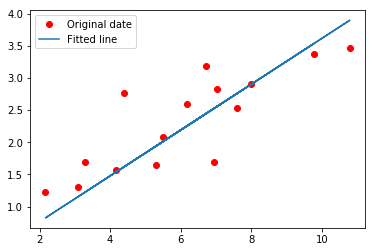

In [8]:
#可视化结果

import matplotlib.pyplot as plt
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label="Original date")
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()